## Tokenization

## Embeddings

- Embeddings should capture features of words, and relationships between words.
- A sentence embedding is just like a word embedding, except it associates every sentence with a vector full of numbers, capturing similarities between sentences. 



[Text embeddings](https://docs.cohere.com/docs/text-embeddings) are a way of representing words/sentences as vectors of numbers. The idea is that words/sentences with similar meanings will have similar vectors. This is useful for many tasks in natural language processing, such as sentiment analysis, machine translation, and question answering.


In [1]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import altair as alt

In [2]:
sentences = [
    "Good morning, how are you?",
    "I am doing well, how about you?",
    "Hi, how are you doing today?",
    "I'm feeling a bit under the weather today.",
    "I like cupcakes.",
    "The earth is the third planet from the sun.",
    "The moon is a natural satellite of the earth.",
    "Jupiter is the fifth planet from the Sun and the largest in the Solar System.",
    "The cat is chasing the mouse.",
    "zxciooi oi oidsfhdoi dsfds",
    "aaaaa",
    "The Large Plane Trees, also known as Road Menders at Saint-Rémy, is an oil-on-canvas painting by Vincent van Gogh."
]

In [3]:
embeddings = np.array([embedding.embed_query(sentence) for sentence in sentences])

In [4]:
dot_product_matrix = np.dot(embeddings, embeddings.T)

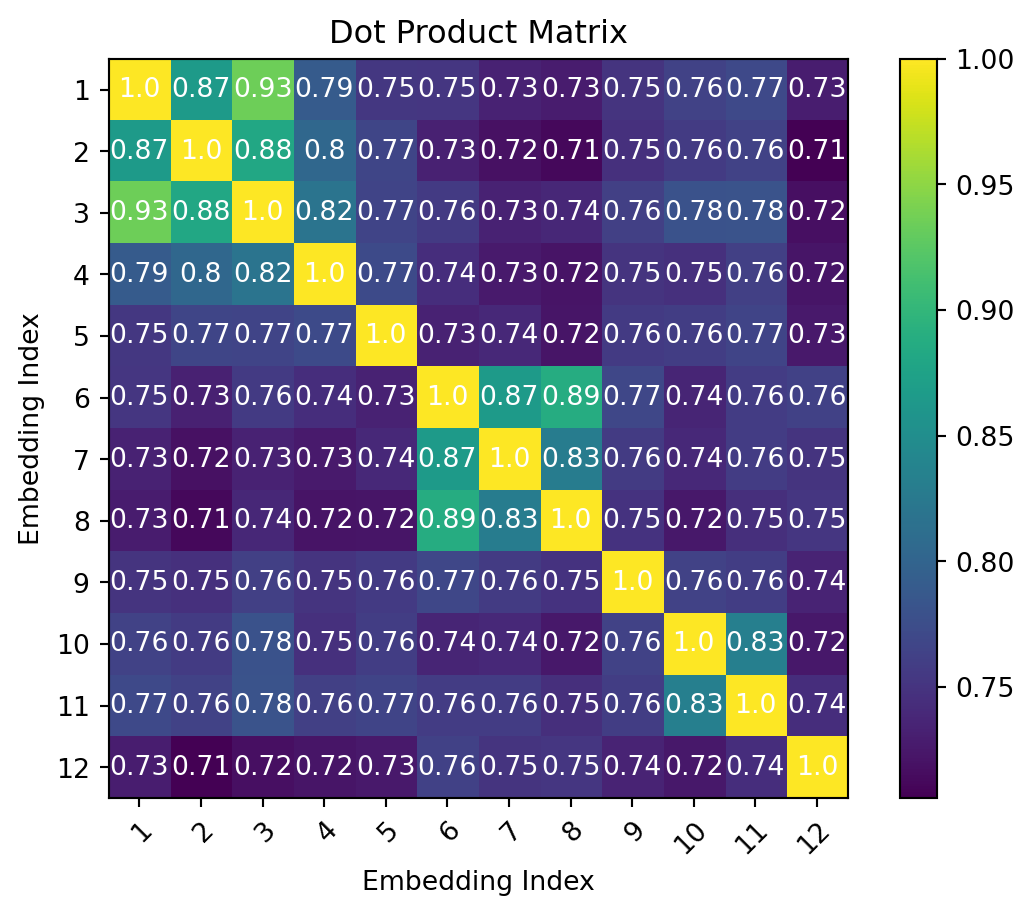

In [5]:
# Plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(dot_product_matrix)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(embeddings)))
ax.set_yticks(np.arange(len(embeddings)))
ax.set_xticklabels(np.arange(1, len(embeddings)+1))
ax.set_yticklabels(np.arange(1, len(embeddings)+1))

# Rotate tick labels and set axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_xlabel('Embedding Index')
ax.set_ylabel('Embedding Index')
ax.set_title('Dot Product Matrix')

# Loop over data dimensions and create text annotations
for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        text = ax.text(j, i, round(dot_product_matrix[i, j], 2),
                       ha="center", va="center", color="w")

# Show plot
plt.show()

In [6]:
df = pd.DataFrame(dot_product_matrix, columns=range(1, len(embeddings)+1))

df['embedding_index'] = range(1, len(embeddings)+1)
df = df.melt(id_vars=['embedding_index'], var_name='embedding_index_2', value_name='similarity')

In [7]:
#| warning: false
from pyobsplot import Plot, d3, Math, js

Plot.plot(
    {
        "height": 640,
        "padding": 0.05,
        "grid": True,
        "x": {"axis": "top", "label": "Embedding Index"},
        "y": {"label": "Embedding Index"},
        "color": {"type": "linear", "scheme": "PiYG"},
        "marks": [
            Plot.cell(
                df,
                {"x": "embedding_index", "y": "embedding_index_2", "fill": "similarity", "tip": True},
            ),
            Plot.text(
                df,
                {
                    "x": "embedding_index",
                    "y": "embedding_index_2",
                    "text": js("d => d.similarity.toFixed(2)"),
                    "title": "title"
                },
            ),
        ],
    }
)

/Users/andrew/GitHub/sites/promptly-literate/env/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



ObsplotWidget(spec={'data': [{'pyobsplot-type': 'DataFrame', 'value': b'ARROW1\x00\x00\xff\xff\xff\xff\xf8\x03…